In [3]:
import pandas as pd
import json
from collections import defaultdict
import numpy as np
import math
from tqdm.notebook import tqdm_notebook as tqdm
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nations = pd.read_json('../public/nations.json')
nations

,name,region,income,population,lifeExpectancy
0,Angola,Sub-Saharan Africa,"[[1800, 359.93], [1820, 359.93], [1913, 556.12...","[[1800, 1567028], [1820, 1567028], [1940, 3738...","[[1800, 26.98], [1940, 26.98], [1950, 29.22], ..."
1,Benin,Sub-Saharan Africa,"[[1800, 553.72], [1820, 553.72], [1913, 855.53...","[[1800, 636559], [1820, 636559], [1950, 167266...","[[1800, 31], [1944, 31], [1950, 36.53], [1951,..."
2,Botswana,Sub-Saharan Africa,"[[1800, 407.36], [1820, 407.36], [1913, 629.4]...","[[1800, 121000], [1904, 121000], [1911, 125000...","[[1800, 33.6], [1945, 33.6], [1950, 46.82], [1..."
3,Burkina Faso,Sub-Saharan Africa,"[[1800, 454.33], [1820, 454.33], [1913, 497.44...","[[1800, 1665421], [1820, 1665421], [1950, 4376...","[[1800, 29.2], [1945, 29.2], [1950, 32.89], [1..."
4,Burundi,Sub-Saharan Africa,"[[1800, 447.59], [1820, 447.59], [1913, 353.82...","[[1800, 899097], [1820, 899097], [1950, 236252...","[[1800, 31.5], [1945, 31.5], [1950, 38.42], [1..."
...,...,...,...,...,...
175,Timor-Leste,East Asia & Pacific,"[[1800, 514.12], [1820, 518.73], [1850, 539.86...","[[1800, 137262], [1820, 137262], [1926, 442000...","[[1950, 28.97], [1951, 29.22], [1952, 29.73], ..."
176,Tokelau,East Asia & Pacific,"[[2005, 889.43]]","[[1800, 1009], [1843, 1000], [1850, 1000], [19...","[[2006, 69]]"
177,Tonga,East Asia & Pacific,"[[1800, 667.71], [1820, 667.71], [1913, 902.69...","[[1800, 18658], [1843, 18500], [1850, 18500], ...","[[1950, 57.91], [1951, 58.1], [1952, 58.47], [..."
178,Vietnam,East Asia & Pacific,"[[1800, 459.71], [1820, 459.71], [1870, 440.8]...","[[1800, 6551000], [1820, 6551000], [1870, 1052...","[[1800, 32], [1930, 32], [1936, 33], [1950, 39..."


In [5]:
inds = 'name year region income population lifeExpectancy'.split()
new_nations = pd.DataFrame({k: [] for k in inds}, index=[])
for nation in tqdm(nations.iterrows(), total=len(nations)):
    d = defaultdict(lambda: {k: None for k in inds[3:]})
    for k in inds[3:]:
        for year, v in nation[1][k]:
            d[year][k] = v
    for year in range(1800, 2010):
        d_tmp = dict(name=nation[1]['name'], year=year, region=nation[1]['region'])
        d_tmp.update(d[year])
        new_nations = new_nations.append(d_tmp, ignore_index=True)
new_nations = new_nations.astype({'name': str, 'year': int, 'region': str, 'income': float, 'population': float, 'lifeExpectancy': float})
new_nations['year'] = pd.to_datetime(new_nations['year'], format='%Y')
new_nations_ = new_nations.set_index(['name', 'year'])
new_nations__ = new_nations.set_index(['name', 'year', 'region'])
new_nations__

income  population  lifeExpectancy
name    year       region                                                  
Angola  1800-01-01 Sub-Saharan Africa    359.93   1567028.0           26.98
        1801-01-01 Sub-Saharan Africa       NaN         NaN             NaN
        1802-01-01 Sub-Saharan Africa       NaN         NaN             NaN
        1803-01-01 Sub-Saharan Africa       NaN         NaN             NaN
        1804-01-01 Sub-Saharan Africa       NaN         NaN             NaN
...                                         ...         ...             ...
Vanuatu 2005-01-01 East Asia & Pacific  3477.00    205754.0           69.26
        2006-01-01 East Asia & Pacific  3632.57    208869.0           69.58
        2007-01-01 East Asia & Pacific  3779.08    211971.0           69.89
        2008-01-01 East Asia & Pacific  3916.57    215053.0           70.20
        2009-01-01 East Asia & Pacific  3943.30         NaN           70.50

[37800 rows x 3 columns]

In [6]:
new_nations.groupby('name').get_group('Angola').sort_values('year').set_index('year').interpolate('time')

,name,region,income,population,lifeExpectancy
year,,,,,
1800-01-01,Angola,Sub-Saharan Africa,359.93,1567028.0,26.98
1801-01-01,Angola,Sub-Saharan Africa,359.93,1567028.0,26.98
1802-01-01,Angola,Sub-Saharan Africa,359.93,1567028.0,26.98
1803-01-01,Angola,Sub-Saharan Africa,359.93,1567028.0,26.98
1804-01-01,Angola,Sub-Saharan Africa,359.93,1567028.0,26.98
...,...,...,...,...,...
2005-01-01,Angola,Sub-Saharan Africa,3533.00,11827315.0,45.52
2006-01-01,Angola,Sub-Saharan Africa,4069.56,12127071.0,46.02
2007-01-01,Angola,Sub-Saharan Africa,4755.46,12420476.0,46.54


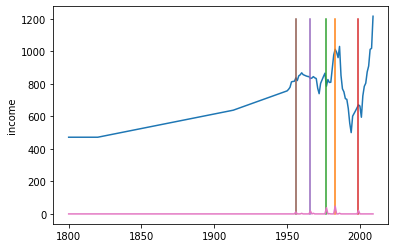

In [25]:
g = new_nations.groupby('name')
for k in g.groups.keys():
    df = g.get_group(k).sort_values('year').set_index('year').interpolate('time')
    break
sns.lineplot(x=range(1800, 2010), y='income', data=df)
p = peaks(df['income'], 5)
for x in np.argsort(p)[::-1][:5]:
    x += 1800
    plt.plot([x, x], [0, 1200])
sns.lineplot(range(1800, 2010), p)

In [22]:
np.linalg.LinAlgError

numpy.linalg.LinAlgError

In [51]:
def c(ys):
    y_mean = np.mean(ys)
    return np.sum(np.abs(ys-y_mean))

def d(ys1, ys2):
    return c(pd.concat([ys1, ys2])) - c(ys1) - c(ys2)


# salient peaks
def A(ys, window_size, K=5):
    peaks = []
    for i in range(1, len(ys)-1):
        if max(ys[i-1], ys[i+1]) < ys[i]:
            peaks.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'peak', d(ys[max(0, i-window_size//2):i], ys[i:i+window_size//2])))
        elif min(ys[i-1], ys[i+1]) > ys[i]:
            peaks.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'valley', d(ys[max(0, i-window_size//2):i], ys[i:i+window_size//2])))
        else:
            pass
    peaks = sorted(peaks, key=lambda x: x[3])[::-1][:K]
    peaks = sorted(peaks, key=lambda x: x[0])
    ret = []
    if len(peaks)==0:
        return ret
    pre_from_, pre_to_, p_type_pre, v = peaks[0]
    if v == 0:
        return ret
    for from_, to_, p_type, v in peaks[1:]:
        if v == 0:
            ret.append((pre_from_, pre_to_, p_type_pre))
            break
        if pre_to_ >= from_:
            pre_to_ = to_
            if p_type_pre != p_type:
                p_type_pre = 'vibration'
        else:
            ret.append((pre_from_, pre_to_, p_type_pre))
            pre_from_, pre_to_, p_type_pre = from_, to_, p_type
    ret.append((pre_from_, pre_to_, p_type_pre))
    return ret


        
def get_grad(ys):
    if len(ys)==0:
        return 0
    ys = np.array(ys).reshape(-1)
    try:
        a, b = np.linalg.lstsq(np.array([[i, 1] for i in range(len(ys))]), ys)[0]
    except np.linalg.LinAlgError:
        a = 0
    return a


# trend changes
def B(ys, window_size, k_sigma=3):
    grad_diff = []
    for i in range(len(ys)):
        grad_former = get_grad(ys[max(0, i-window_size//2):i])
        grad_latter = get_grad(ys[i:i+window_size//2])
        grad_diff.append(grad_former-grad_latter)
    x = np.array(grad_diff)
    xmean = x.mean(axis=0)
    xstd  = np.std(x, axis=0)
    change_points = []
    for i in range(len(x)):
        if x[i] < xmean-k_sigma*xstd:
            change_points.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'trend_increase'))
        elif xmean+k_sigma*xstd < x[i]:
            change_points.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'trend_decrease'))

    ret = []
    if len(change_points)==0:
        return ret

    pre_from_, pre_to_, p_type_pre = change_points[0]
    for from_, to_, p_type in change_points[1:]:
        if pre_to_ >= from_:
            pre_to_ = to_
            if p_type_pre != p_type:
                p_type_pre = 'trend_confusion'
        else:
            ret.append((pre_from_, pre_to_, p_type_pre))
            pre_from_, pre_to_, p_type_pre = from_, to_, p_type
    ret.append((pre_from_, pre_to_, p_type_pre))
    return ret


def large_grad(ys, window_size, k_sigma=2):
    grads = [get_grad(ys[max(0, i-window_size//2):i+window_size//2]) for i in range(len(ys))]
    x = np.array(grads)
    xmean = x.mean(axis=0)
    xstd  = np.std(x, axis=0)
    large_grad_points = []
    for i in range(len(x)):
        if x[i] < xmean-k_sigma*xstd:
            large_grad_points.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'neg_grad'))
        elif xmean+k_sigma*xstd < x[i]:
            large_grad_points.append((int(max(0, i-window_size//2)), int(min(len(ys), i+window_size//2)), 'pos_grad'))
    ret = []
    if len(large_grad_points)==0:
        return ret

    pre_from_, pre_to_, p_type_pre = large_grad_points[0]
    for from_, to_, p_type in large_grad_points[1:]:
        if pre_to_ >= from_ and p_type_pre == p_type:
            pre_to_ = to_
        else:
            ret.append((pre_from_, pre_to_, p_type_pre))
            pre_from_, pre_to_, p_type_pre = from_, to_, p_type
    ret.append((pre_from_, pre_to_, p_type_pre))
    return ret
    

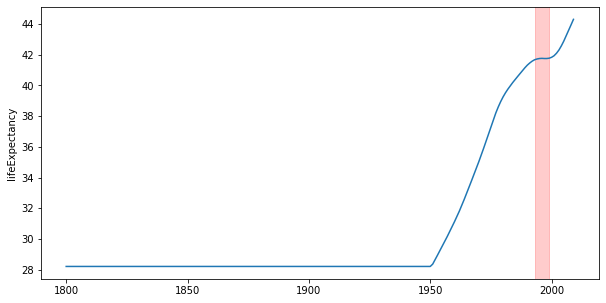

/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


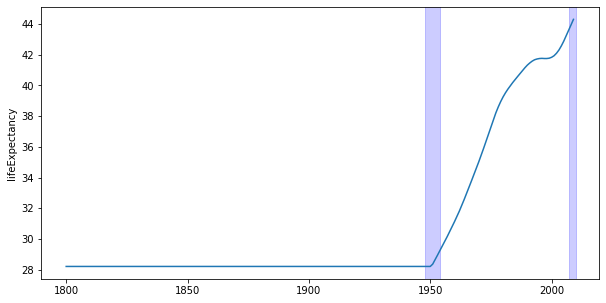

/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


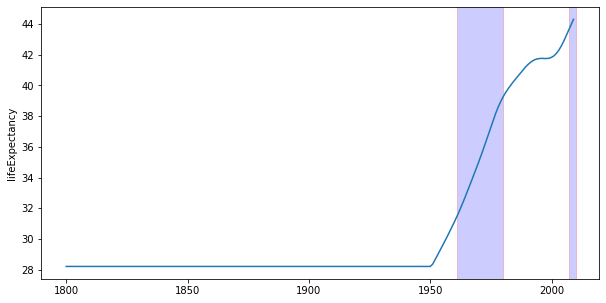

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

ind = 'lifeExpectancy'
# ind = 'income'
window_size_A = 6
window_size_B = 4
window_size_C = 4

g = new_nations.groupby('name')
for k in g.groups.keys():
    df = g.get_group(k).sort_values('year').set_index('year').interpolate('time')
    break
ys = df[ind]


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.lineplot(x=range(1800, 2010), y=ind, data=df)
for from_, to_, ptype in A(ys, window_size_A):
    from_ += 1800
    to_ += 1800
    ax.add_patch(pat.Rectangle(xy=(from_, 0), width=to_-from_, height=1200, color='red', alpha=0.2))
    x = (from_+to_)/2
    # plt.plot([x, x], [0, 1200])
plt.show()


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.lineplot(x=range(1800, 2010), y=ind, data=df)
for from_, to_, ptype in B(ys, window_size_B, k_sigma=3):
    from_ += 1800
    to_ += 1800
    ax.add_patch(pat.Rectangle(xy=(from_, 0), width=to_-from_, height=1200, color='blue', alpha=0.2))
    x = (from_+to_)/2
    # plt.plot([x, x], [0, 1200])
plt.show()


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
sns.lineplot(x=range(1800, 2010), y=ind, data=df)
for from_, to_, ptype in large_grad(ys, window_size_C, k_sigma=2):
    from_ += 1800
    to_ += 1800
    ax.add_patch(pat.Rectangle(xy=(from_, 0), width=to_-from_, height=1200, facecolor='blue', edgecolor='red', alpha=0.2))
    x = (from_+to_)/2
    # plt.plot([x, x], [0, 1200])
plt.show()

In [15]:
new_nations

,name,year,region,income,population,lifeExpectancy
0,Angola,1800-01-01,Sub-Saharan Africa,359.93,1567028.0,26.98
1,Angola,1801-01-01,Sub-Saharan Africa,NaN,NaN,NaN
2,Angola,1802-01-01,Sub-Saharan Africa,NaN,NaN,NaN
3,Angola,1803-01-01,Sub-Saharan Africa,NaN,NaN,NaN
4,Angola,1804-01-01,Sub-Saharan Africa,NaN,NaN,NaN
...,...,...,...,...,...,...
37795,Vanuatu,2005-01-01,East Asia & Pacific,3477.00,205754.0,69.26
37796,Vanuatu,2006-01-01,East Asia & Pacific,3632.57,208869.0,69.58
37797,Vanuatu,2007-01-01,East Asia & Pacific,3779.08,211971.0,69.89
37798,Vanuatu,2008-01-01,East Asia & Pacific,3916.57,215053.0,70.20


In [11]:
template = "{country}'s {ind} has {ptype} ({from_} ~ {to_})\n"
template_A = "{country}'s {ind} has peak from {from_} to {to_}\n"
template_B = "{country}'s {ind}'s tread has changed from {from_} to {to_}\n"

In [52]:
def datafact2text(country, ind, from_, to_, ptype):
    return template.format(country=country, ind=ind, from_=from_, to_=to_, ptype=ptype)


def datafacts2json(datafacts, fname=None):
    ret = []
    pre_country = None
    for country, ind, from_, to_, ptype in datafacts:
        if pre_country != country:
            d_ = {'text': country, 'focusArgs': [None, [country]]}
            ret.append(d_)
            pre_country = country
        d_ = {'text': template.format(country=country, ind=ind, from_=from_, to_=to_, ptype=ptype),
                'focusArgs': [[from_, to_], [country]]}
        ret.append(d_)
    if fname is not None:
        with open(fname, 'w') as  f:
            json_text = json.dumps(ret)
            f.write(json_text)
    return ret

def get_datafacts(df, inds='income population lifeExpectancy'.split(), window_size_A=6, window_size_B=4, window_size_C=4):
    g = df.groupby('name')
    ret = []
    for country in tqdm(g.groups.keys()):
        df_ = g.get_group(country).sort_values('year').set_index('year').interpolate('time')
        for ind in inds:
            ys = df_[ind]
            for from_, to_, ptype in A(ys, window_size_A):
                from_ += 1800
                to_ += 1800
                ret.append((country, ind, from_, to_, ptype))
            for from_, to_, ptype in B(ys, window_size_B):
                from_ += 1800
                to_ += 1800
                ret.append((country, ind, from_, to_, ptype))
            for from_, to_, ptype in large_grad(ys, window_size_C):
                from_ += 1800
                to_ += 1800
                ret.append((country, ind, from_, to_, ptype))
    return ret

In [53]:
datafacts = get_datafacts(new_nations)
len(datafacts)

/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


3607

In [54]:
datafacts2json(datafacts, fname='../public/nations_change.json')

[{'text': 'Afghanistan', 'focusArgs': [None, ['Afghanistan']]},
 {'text': "Afghanistan's income has peak (1953 ~ 1959)\n",
  'focusArgs': [[1953, 1959], ['Afghanistan']]},
 {'text': "Afghanistan's income has vibration (1974 ~ 1989)\n",
  'focusArgs': [[1974, 1989], ['Afghanistan']]},
 {'text': "Afghanistan's income has valley (1998 ~ 2004)\n",
  'focusArgs': [[1998, 2004], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_increase (1970 ~ 1974)\n",
  'focusArgs': [[1970, 1974], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_confusion (1984 ~ 1990)\n",
  'focusArgs': [[1984, 1990], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_increase (1992 ~ 1996)\n",
  'focusArgs': [[1992, 1996], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_confusion (1999 ~ 2005)\n",
  'focusArgs': [[1999, 2005], ['Afghanistan']]},
 {'text': "Afghanistan's income has pos_grad (1979 ~ 1984)\n",
  'focusArgs': [[1979, 1984], ['Afghanistan']]},
 {'text': "Afghanis

In [34]:
window_size_A = 6
window_size_B = 4
window_size_C = 4

g = new_nations.groupby('name')
data = []
for country in tqdm(g.groups.keys()):
    df = g.get_group(country).sort_values('year').set_index('year').interpolate('time')
    data.append({'text': country,
                'focusArgs': [None, [country]]})
    for ind in 'income population lifeExpectancy'.split():
        ys = df[ind]
        for from_, to_, ptype in A(ys, window_size_A):
            from_ += 1800
            to_ += 1800
            d_ = {'text': template.format(country=country, ind=ind, from_=from_, to_=to_, ptype=ptype),
                'focusArgs': [[from_, to_], [country]]}
            data.append(d_)
        for from_, to_, ptype in B(ys, window_size_B):
            from_ += 1800
            to_ += 1800
            d_ = {'text': template.format(country=country, ind=ind, from_=from_, to_=to_, ptype=ptype),
                'focusArgs': [[from_, to_], [country]]}
            data.append(d_)
        for from_, to_, ptype in large_grad(ys, window_size_C):
            from_ += 1800
            to_ += 1800
            d_ = {'text': template.format(country=country, ind=ind, from_=from_, to_=to_, ptype=ptype),
                'focusArgs': [[from_, to_], [country]]}
            data.append(d_)
"""
with open('../public/afghan.json', 'w') as  f:
    json_text = json.dumps(data)
    f.write(json_text)
"""
len(data)

/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


3094

In [26]:
data

[{'text': 'Afghanistan', 'focusArgs': [None, ['Afghanistan']]},
 {'text': "Afghanistan's income has peak (1953 ~ 1959)\n",
  'focusArgs': [[1953, 1959], ['Afghanistan']]},
 {'text': "Afghanistan's income has vibration (1974 ~ 1989)\n",
  'focusArgs': [[1974, 1989], ['Afghanistan']]},
 {'text': "Afghanistan's income has valley (1998 ~ 2004)\n",
  'focusArgs': [[1998, 2004], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_increase (1970 ~ 1974)\n",
  'focusArgs': [[1970, 1974], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_confusion (1984 ~ 1990)\n",
  'focusArgs': [[1984, 1990], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_increase (1992 ~ 1996)\n",
  'focusArgs': [[1992, 1996], ['Afghanistan']]},
 {'text': "Afghanistan's income has trend_confusion (1999 ~ 2005)\n",
  'focusArgs': [[1999, 2005], ['Afghanistan']]},
 {'text': "Afghanistan's income has pos_grad (1980 ~ 1984)\n",
  'focusArgs': [[1980, 1984], ['Afghanistan']]},
 {'text': "Afghanis

In [25]:
with open('../public/nations_change.json', 'w') as  f:
    json_text = json.dumps(data)
    f.write(json_text)

In [108]:
dir(json.decoder)

['BACKSLASH',
 'FLAGS',
 'JSONArray',
 'JSONDecodeError',
 'JSONDecoder',
 'JSONObject',
 'NaN',
 'NegInf',
 'PosInf',
 'STRINGCHUNK',
 'WHITESPACE',
 'WHITESPACE_STR',
 '_CONSTANTS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_decode_uXXXX',
 'c_scanstring',
 'py_scanstring',
 're',
 'scanner',
 'scanstring']

In [116]:
with open('../public/afghan.json') as  f:
    tmp = json.load(f)
tmp

[{'text': "Afghanistan's income has peak from 181 to 185",
  'focus_args': [[181, 185], ['Afghanistan']]},
 {'text': "Afghanistan's income has peak from 175 to 179",
  'focus_args': [[175, 179], ['Afghanistan']]},
 {'text': "Afghanistan's income has peak from 197 to 201",
  'focus_args': [[197, 201], ['Afghanistan']]},
 {'text': "Afghanistan's income has peak from 164 to 168",
  'focus_args': [[164, 168], ['Afghanistan']]},
 {'text': "Afghanistan's income has peak from 154 to 158",
  'focus_args': [[154, 158], ['Afghanistan']]},
 {'text': "Afghanistan's income's tread has changed from 178 to 183",
  'focus_args': [[178, 183], ['Afghanistan']]},
 {'text': "Afghanistan's income's tread has changed from 180 to 185",
  'focus_args': [[180, 185], ['Afghanistan']]},
 {'text': "Afghanistan's income's tread has changed from 181 to 186",
  'focus_args': [[181, 186], ['Afghanistan']]},
 {'text': "Afghanistan's income's tread has changed from 183 to 188",
  'focus_args': [[183, 188], ['Afghanista

In [62]:
len(B(ys, 5))

209 210


/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


10

In [40]:
plt.rect

AttributeError: module 'matplotlib.pyplot' has no attribute 'rect'

In [20]:
len(grads(df['income'], 5))

/Users/hirotanaka/.pyenv/versions/miniconda3-4.3.30/envs/tdb/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


210